## Importing Dependencies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Setting plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Reaing The Dataset

In [9]:
acsd = pd.read_csv('/content/academic_Stress.csv')

Print the values from dataset

In [10]:
acsd.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [11]:
# Size of the data
acsd.shape

(140, 9)

In [12]:
# Checking Datatype
acsd.dtypes

,0
Timestamp,object
Your Academic Stage,object
Peer pressure,int64
Academic pressure from your home,int64
Study Environment,object
What coping strategy you use as a student?,object
"Do you have any bad habits like smoking, drinking on a daily basis?",object
What would you rate the academic competition in your student life,int64
Rate your academic stress index,int64


In [13]:
# Checking Null values
acsd.isnull().sum()

,0
Timestamp,0
Your Academic Stage,0
Peer pressure,0
Academic pressure from your home,0
Study Environment,1
What coping strategy you use as a student?,0
"Do you have any bad habits like smoking, drinking on a daily basis?",0
What would you rate the academic competition in your student life,0
Rate your academic stress index,0


In [16]:
# Deleting The Null Values From Dataset
acsd = acsd.dropna()

In [17]:
acsd.isnull().sum()

,0
Timestamp,0
Your Academic Stage,0
Peer pressure,0
Academic pressure from your home,0
Study Environment,0
What coping strategy you use as a student?,0
"Do you have any bad habits like smoking, drinking on a daily basis?",0
What would you rate the academic competition in your student life,0
Rate your academic stress index,0


In [18]:
# Checking Shape Again
acsd.shape

(139, 9)

In [21]:
# Checking Duplicates Values
acsd.duplicated().sum()

np.int64(0)

In [22]:
# Basic data info
print("\nDataset Info:")
acsd.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            139 non-null    object
 1   Your Academic Stage                                                  139 non-null    object
 2   Peer pressure                                                        139 non-null    int64 
 3   Academic pressure from your home                                     139 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           139 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  139 non-null    object
 7   What wou

In [23]:
# Basic data Stats
print("\nDataset Stats:")
acsd.describe()


Dataset Stats:


,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,139.000000,139.000000,139.000000,139.000000
mean,3.057554,3.165468,3.482014,3.719424
std,1.075213,1.271751,1.024005,1.035800
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [38]:
acsd.columns=acsd.columns.str.strip() \
.str.lower()\
.str.replace(" ","_")
acsd.columns

Index(['timestamp', 'your_academic_stage', 'peer_pressure',
       'academic_pressure_from_your_home', 'study_environment',
       'what_coping_strategy_you_use_as_a_student?',
       'do_you_have_any_bad_habits_like_smoking,_drinking_on_a_daily_basis?',
       'what_would_you_rate_the_academic__competition_in_your_student_life',
       'rate_your_academic_stress_index'],
      dtype='object')

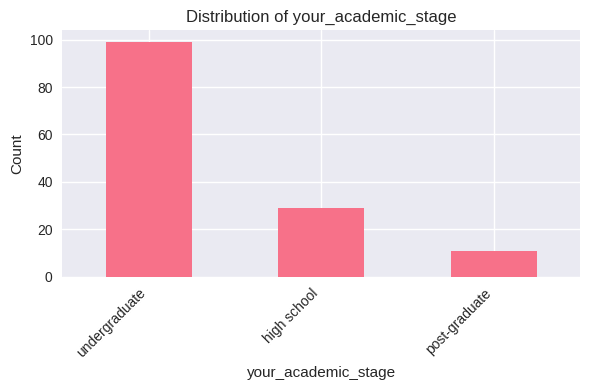

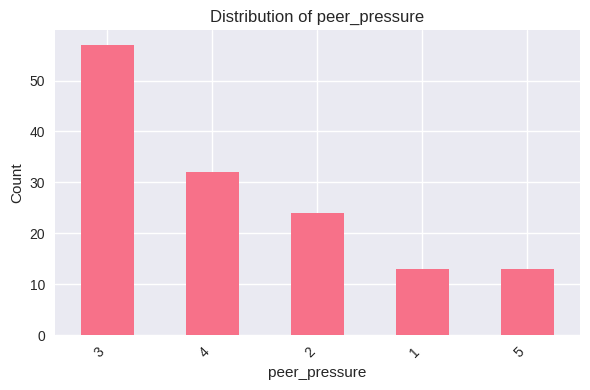

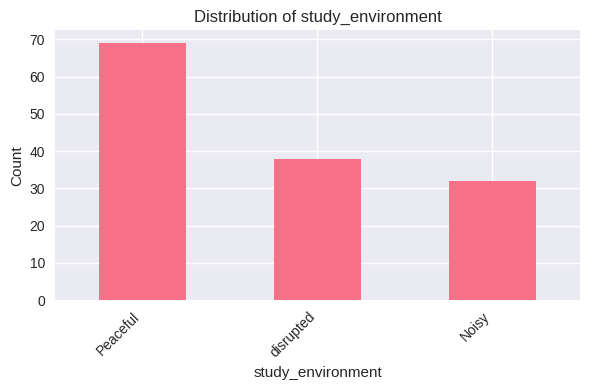

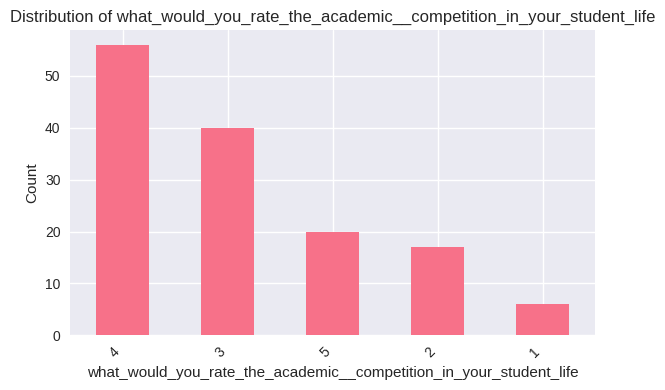

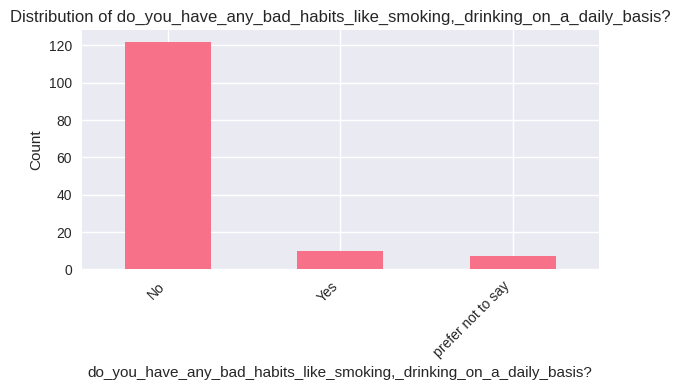

In [45]:
for col in cols:
    plt.figure(figsize=(6,4))
    acsd[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [42]:
acsd['timestamp']=pd.to_datetime(acsd['timestamp'])

In [43]:
cols=['your_academic_stage','peer_pressure','study_environment',
      'what_would_you_rate_the_academic__competition_in_your_student_life',
      'do_you_have_any_bad_habits_like_smoking,_drinking_on_a_daily_basis?']
for col in cols:
    print(f"\nValue counts for {col} :")
    print(acsd[col].value_counts())


Value counts for your_academic_stage :
your_academic_stage
undergraduate    99
high school      29
post-graduate    11
Name: count, dtype: int64

Value counts for peer_pressure :
peer_pressure
3    57
4    32
2    24
1    13
5    13
Name: count, dtype: int64

Value counts for study_environment :
study_environment
Peaceful     69
disrupted    38
Noisy        32
Name: count, dtype: int64

Value counts for what_would_you_rate_the_academic__competition_in_your_student_life :
what_would_you_rate_the_academic__competition_in_your_student_life
4    56
3    40
5    20
2    17
1     6
Name: count, dtype: int64

Value counts for do_you_have_any_bad_habits_like_smoking,_drinking_on_a_daily_basis? :
do_you_have_any_bad_habits_like_smoking,_drinking_on_a_daily_basis?
No                   122
Yes                   10
prefer not to say      7
Name: count, dtype: int64


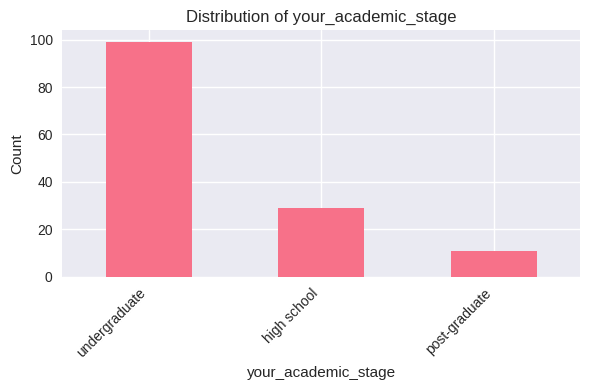

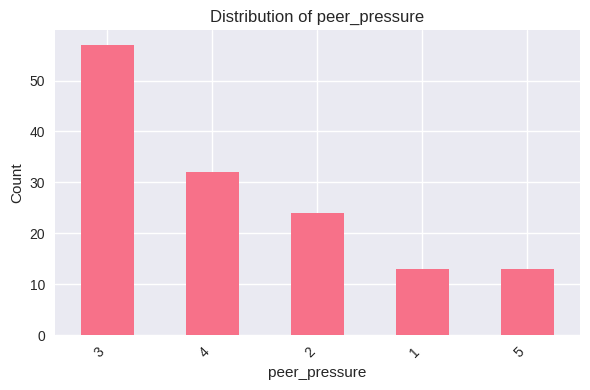

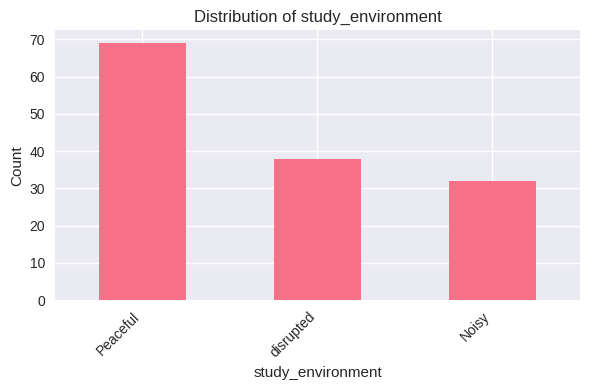

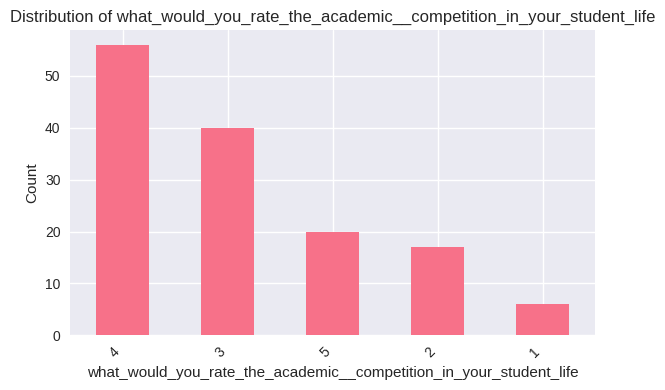

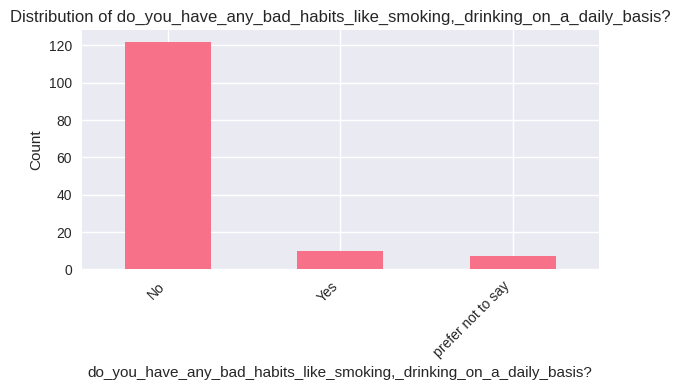

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cols:
    plt.figure(figsize=(6,4))
    acsd[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

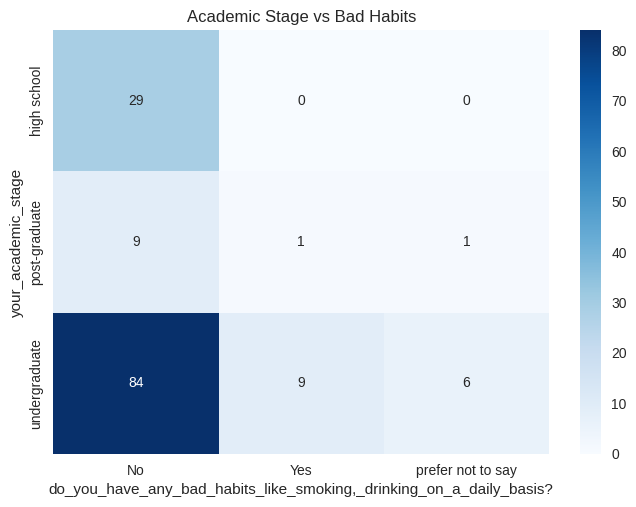

In [46]:
 # Cross-tab for counts
ct = pd.crosstab(acsd['your_academic_stage'], acsd['do_you_have_any_bad_habits_like_smoking,_drinking_on_a_daily_basis?'])

sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Academic Stage vs Bad Habits")
plt.show()

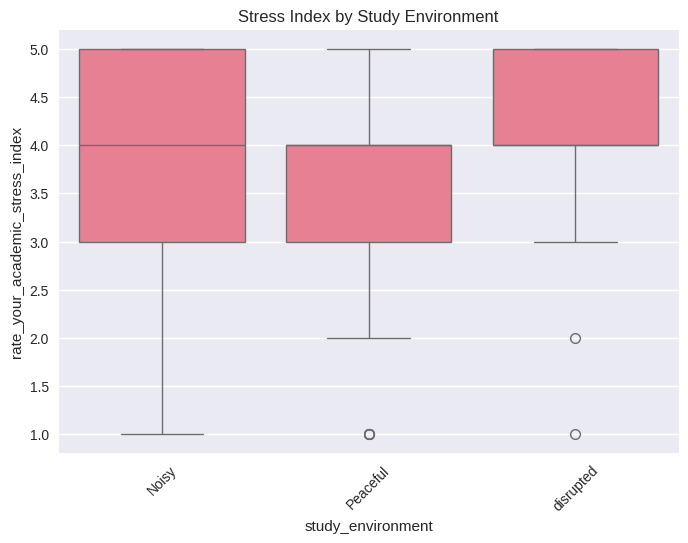

In [47]:
sns.boxplot(x="study_environment", y="rate_your_academic_stress_index", data=acsd)
plt.title("Stress Index by Study Environment")
plt.xticks(rotation=45)
plt.show()

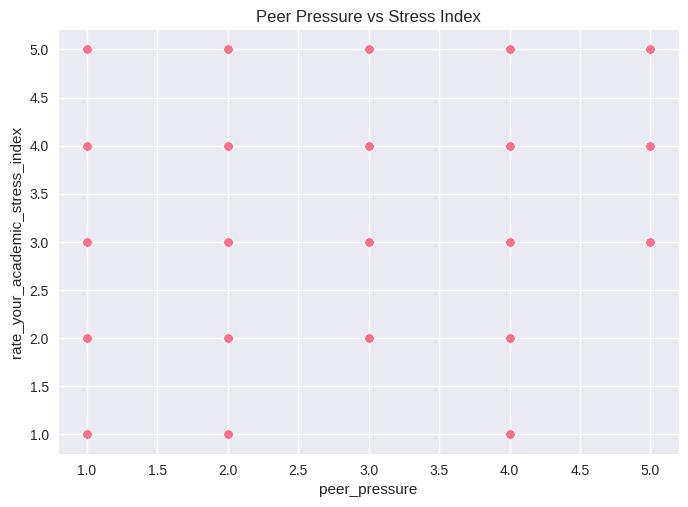

In [48]:
sns.scatterplot(x="peer_pressure", y="rate_your_academic_stress_index", data=acsd)
plt.title("Peer Pressure vs Stress Index")
plt.show()

In [49]:
acsd.groupby('study_environment')['rate_your_academic_stress_index'].mean()

,rate_your_academic_stress_index
study_environment,
Noisy,3.843750
Peaceful,3.492754
disrupted,4.026316


In [51]:
acsd.groupby(
    ['your_academic_stage','do_you_have_any_bad_habits_like_smoking,_drinking_on_a_daily_basis?']
)['rate_your_academic_stress_index'].mean()

your_academic_stage  do_you_have_any_bad_habits_like_smoking,_drinking_on_a_daily_basis?
high school          No                                                                     3.827586
post-graduate        No                                                                     3.666667
                     Yes                                                                    4.000000
                     prefer not to say                                                      4.000000
undergraduate        No                                                                     3.630952
                     Yes                                                                    4.333333
                     prefer not to say                                                      3.500000
Name: rate_your_academic_stress_index, dtype: float64

<Axes: xlabel='do_you_have_any_bad_habits_like_smoking,_drinking_on_a_daily_basis?', ylabel='rate_your_academic_stress_index'>

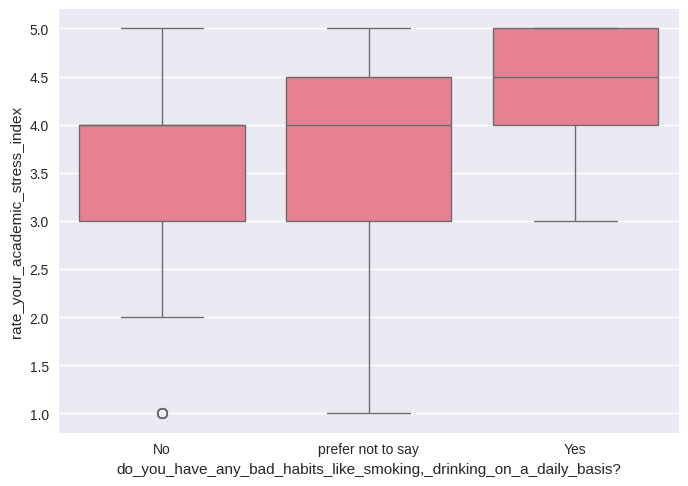

In [52]:
import seaborn as sns
sns.boxplot(x="do_you_have_any_bad_habits_like_smoking,_drinking_on_a_daily_basis?",
            y="rate_your_academic_stress_index", data=acsd)

In [53]:
pd.crosstab(acsd['your_academic_stage'],
            acsd['do_you_have_any_bad_habits_like_smoking,_drinking_on_a_daily_basis?'],
            values=acsd['rate_your_academic_stress_index'],
            aggfunc='mean')

"do_you_have_any_bad_habits_like_smoking,_drinking_on_a_daily_basis?",No,Yes,prefer not to say
your_academic_stage,,,
high school,3.827586,NaN,NaN
post-graduate,3.666667,4.000000,4.0
undergraduate,3.630952,4.333333,3.5
